Yurag, Marivient Alexia R.

BSCS - IS - 4B

**Machine Problem 3: Feature Extraction and Object Detection**

Objective:

The objective of this machine problem is to implement and compare the three feature extraction methods (SIFT, SURF, and ORB) in a single task. You will use these methods for feature matching between two images, then perform image alignment using Homography to warp one image onto the other.

**Import/install necessary libraries**

In [ ]:
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image

**Cloning OpenCV repo to enbale SURF feature extraction**

In [ ]:
# Install dependencies required for building OpenCV
!apt update && apt install -y build-essential cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

# Clone the OpenCV and OpenCV Contrib repositories
!rm -rf opencv opencv_contrib  # Clear any previous installations
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

# Create a build directory and navigate to it
!mkdir -p opencv/build
%cd opencv/build

# Run CMake configuration with OPENCV_ENABLE_NONFREE enabled
!cmake -D CMAKE_BUILD_TYPE=Release \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..

# Compile OpenCV (this will take a while)
!make -j8

# Install the compiled OpenCV library
!make install
!ldconfig


**To check if the SURF function is available already.**

In [ ]:
import cv2
try:
    surf = cv2.xfeatures2d.SURF_create()
    print("SURF is enabled and ready to use!")
except AttributeError:
    print("SURF is not available.")


SURF is enabled and ready to use!


**Step 1: Load Images**

In [ ]:
# Load the images
img1_path = '/content/dog1.png'
img2_path = '/content/dog2.png'

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

**SIFT FEATURE EXTRACTION**

SIFT - Keypoints in Image 1: 396, Keypoints in Image 2: 234


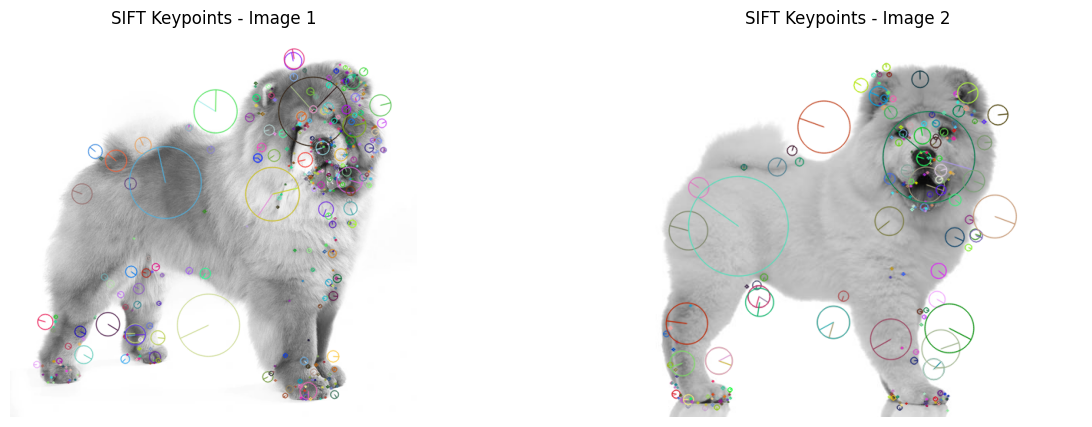

In [ ]:
# SIFT Feature Extraction
sift = cv2.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

# Print the number of keypoints detected for SIFT and display keypoints
print(f"SIFT - Keypoints in Image 1: {len(kp1_sift)}, Keypoints in Image 2: {len(kp2_sift)}")

# Display SIFT Keypoints
img1_sift = cv2.drawKeypoints(img1, kp1_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_sift = cv2.drawKeypoints(img2, kp2_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_sift, cmap='gray')
plt.title("SIFT Keypoints - Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_sift, cmap='gray')
plt.title("SIFT Keypoints - Image 2")
plt.axis('off')

plt.show()


**SURF FEATURE EXTRACTION**

SURF - Keypoints in Image 1: 1057, Keypoints in Image 2: 469


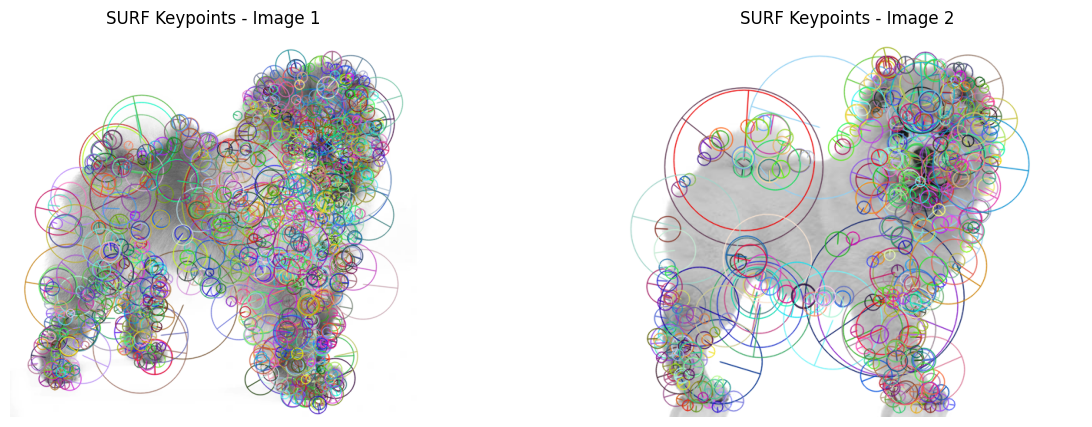

In [ ]:
# SURF Feature Extraction
surf = cv2.xfeatures2d.SURF_create()
kp1_surf, des1_surf = surf.detectAndCompute(img1, None)
kp2_surf, des2_surf = surf.detectAndCompute(img2, None)

# Print the number of keypoints detected for SURF and display keypoints
print(f"SURF - Keypoints in Image 1: {len(kp1_surf)}, Keypoints in Image 2: {len(kp2_surf)}")

# Display SURF Keypoints
img1_surf = cv2.drawKeypoints(img1, kp1_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_surf = cv2.drawKeypoints(img2, kp2_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_surf, cmap='gray')
plt.title("SURF Keypoints - Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_surf, cmap='gray')
plt.title("SURF Keypoints - Image 2")
plt.axis('off')

plt.show()


**ORB FEATURE EXTRACTION**

ORB - Keypoints in Image 1: 500, Keypoints in Image 2: 500


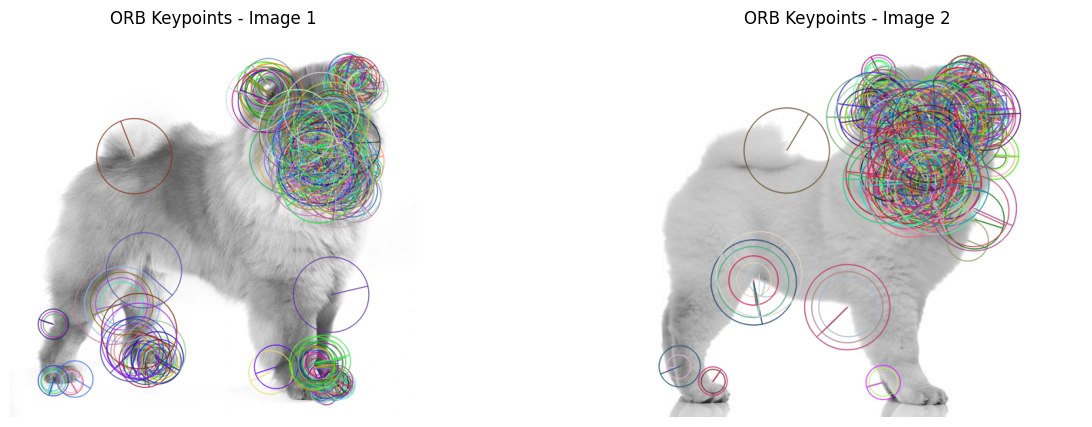

In [ ]:
# ORB Feature Extraction
orb = cv2.ORB_create()
kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

# Print the number of keypoints detected for ORB and display keypoints
print(f"ORB - Keypoints in Image 1: {len(kp1_orb)}, Keypoints in Image 2: {len(kp2_orb)}")

# Display ORB Keypoints
img1_orb = cv2.drawKeypoints(img1, kp1_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_orb = cv2.drawKeypoints(img2, kp2_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_orb, cmap='gray')
plt.title("ORB Keypoints - Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_orb, cmap='gray')
plt.title("ORB Keypoints - Image 2")
plt.axis('off')

plt.show()


**Step 3: Feature Matching with Brute-Force and FLANN**

**Feature Matching with Brute-Force Matcher**

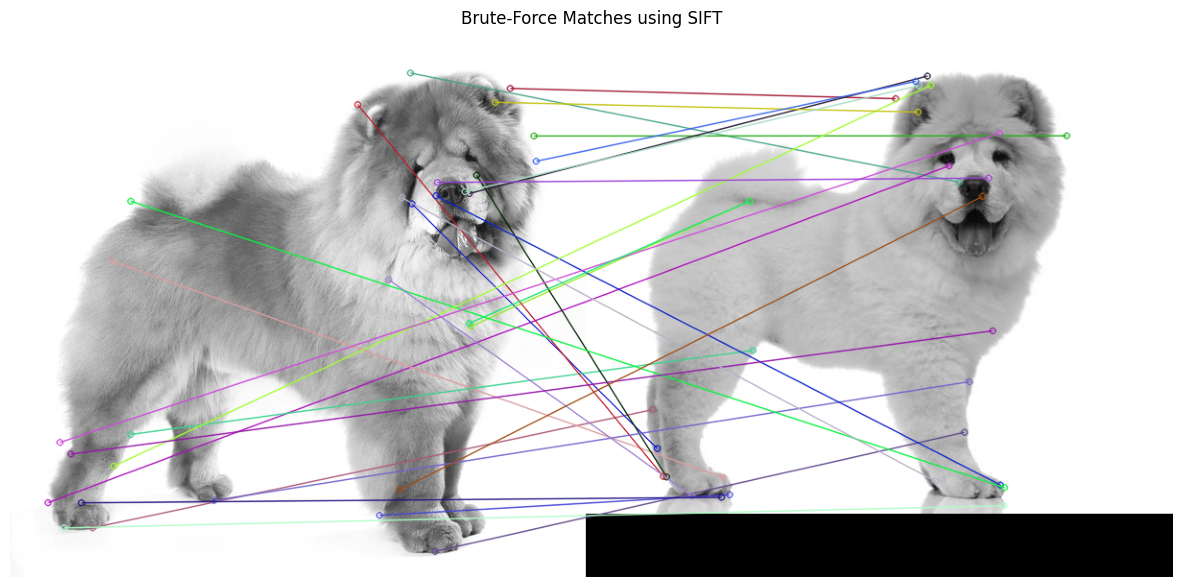

In [ ]:
# Brute-Force Matcher
# Using SIFT descriptors for matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf.match(des1_sift, des2_sift)

# Sort matches by distance
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Draw matches
img_matches_sift = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, matches_sift[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(15, 10))
plt.imshow(img_matches_sift)
plt.title("Brute-Force Matches using SIFT")
plt.axis('off')
plt.show()


**Feature Matching with FLANN Matcher**

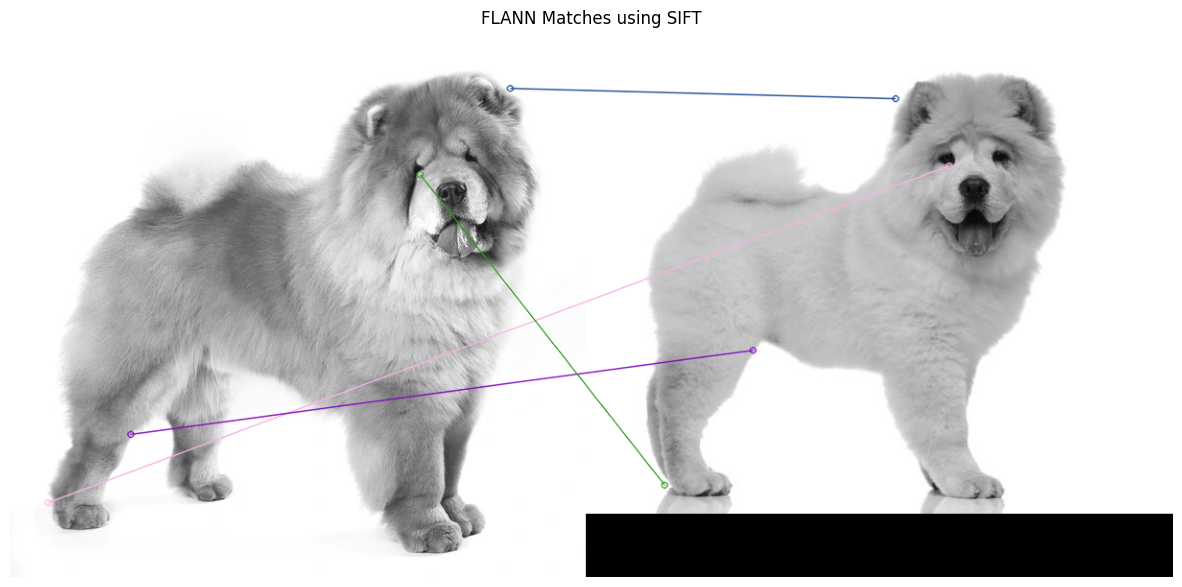

In [ ]:
# FLANN Matcher
# Prepare FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

# Using SIFT descriptors for matching
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(des1_sift, des2_sift, k=2)

# Need to draw only good matches, so we need to draw first 'k' matches
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.7 * n.distance:
        good_matches_flann.append(m)

# Draw matches
img_matches_flann = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, good_matches_flann[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(15, 10))
plt.imshow(img_matches_flann)
plt.title("FLANN Matches using SIFT")
plt.axis('off')
plt.show()


**Step 4: Image Alignment Using Homography**

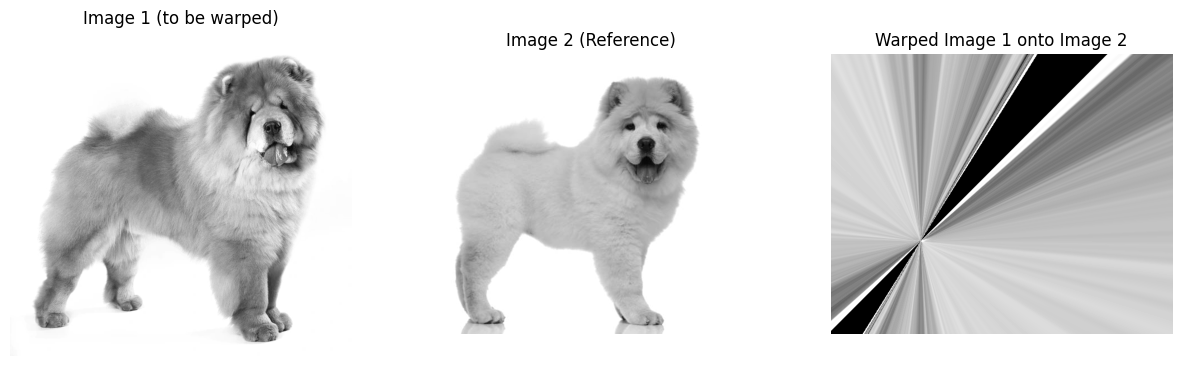

In [ ]:
# Check if there are enough good matches to compute a homography (at least 4 matches are needed)
if len(good_matches_flann) >= 4:
    # Extract the matched keypoints' coordinates
    src_pts = np.float32([kp1_sift[m.queryIdx].pt for m in good_matches_flann]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2_sift[m.trainIdx].pt for m in good_matches_flann]).reshape(-1, 1, 2)

    # Compute the homography matrix using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # If the homography is found, warp img1 onto img2's perspective
    if H is not None:
        # Warp img1 to img2's perspective using the computed homography
        height, width = img2.shape
        warped_image = cv2.warpPerspective(img1, H, (width, height))

        # Display the original, reference, and aligned images
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img1, cmap='gray')
        plt.title("Image 1 (to be warped)")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(img2, cmap='gray')
        plt.title("Image 2 (Reference)")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(warped_image, cmap='gray')
        plt.title("Warped Image 1 onto Image 2")
        plt.axis('off')

        plt.show()
    else:
        print("Homography could not be computed.")
else:
    print("Not enough good matches to compute a homography. At least 4 matches are required.")


**Step 5: Performance Analysis**

In [ ]:
import time

# Measure execution time and keypoints for each detector
def feature_detection_analysis(detector, name):
    start_time = time.time()
    kp1, des1 = detector.detectAndCompute(img1, None)
    kp2, des2 = detector.detectAndCompute(img2, None)
    duration = time.time() - start_time
    print(f"{name} - Keypoints in Image 1: {len(kp1)}, Keypoints in Image 2: {len(kp2)}, Time Taken: {duration:.4f} seconds")
    return kp1, des1, kp2, des2, duration

# Analyze SIFT
sift_detector = cv2.SIFT_create()
kp1_sift, des1_sift, kp2_sift, des2_sift, time_sift = feature_detection_analysis(sift_detector, "SIFT")

# Analyze SURF
surf_detector = cv2.xfeatures2d.SURF_create()
kp1_surf, des1_surf, kp2_surf, des2_surf, time_surf = feature_detection_analysis(surf_detector, "SURF")

# Analyze ORB
orb_detector = cv2.ORB_create()
kp1_orb, des1_orb, kp2_orb, des2_orb, time_orb = feature_detection_analysis(orb_detector, "ORB")

# Brute-Force Matcher and FLANN Matcher comparisons for SIFT
print("\nFeature Matching Performance:")

# Brute-Force Matcher (using SIFT)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
start_time = time.time()
matches_sift_bf = bf.match(des1_sift, des2_sift)
matches_sift_bf = sorted(matches_sift_bf, key=lambda x: x.distance)
time_bf = time.time() - start_time
print(f"Brute-Force Matcher (SIFT) - Matches Found: {len(matches_sift_bf)}, Time Taken: {time_bf:.4f} seconds")

# FLANN Matcher (using SIFT)
flann = cv2.FlannBasedMatcher(index_params, search_params)
start_time = time.time()
matches_sift_flann = flann.knnMatch(des1_sift, des2_sift, k=2)
# Filter matches using Lowe's ratio test
good_matches_flann = [m for m, n in matches_sift_flann if m.distance < 0.7 * n.distance]
time_flann = time.time() - start_time
print(f"FLANN Matcher (SIFT) - Good Matches Found: {len(good_matches_flann)}, Time Taken: {time_flann:.4f} seconds")

# Summary of Results
print("\n--- Performance Summary ---")
print(f"SIFT - Keypoints: {len(kp1_sift)}, Time: {time_sift:.4f}s")
print(f"SURF - Keypoints: {len(kp1_surf)}, Time: {time_surf:.4f}s")
print(f"ORB  - Keypoints: {len(kp1_orb)}, Time: {time_orb:.4f}s")
print(f"Brute-Force Matcher (SIFT): {len(matches_sift_bf)} matches, Time: {time_bf:.4f}s")
print(f"FLANN Matcher (SIFT): {len(good_matches_flann)} good matches, Time: {time_flann:.4f}s")


SIFT - Keypoints in Image 1: 396, Keypoints in Image 2: 234, Time Taken: 0.4273 seconds
SURF - Keypoints in Image 1: 1057, Keypoints in Image 2: 469, Time Taken: 0.6735 seconds
ORB - Keypoints in Image 1: 500, Keypoints in Image 2: 500, Time Taken: 0.0213 seconds

Feature Matching Performance:
Brute-Force Matcher (SIFT) - Matches Found: 95, Time Taken: 0.0135 seconds
FLANN Matcher (SIFT) - Good Matches Found: 3, Time Taken: 0.0154 seconds

--- Performance Summary ---
SIFT - Keypoints: 396, Time: 0.4273s
SURF - Keypoints: 1057, Time: 0.6735s
ORB  - Keypoints: 500, Time: 0.0213s
Brute-Force Matcher (SIFT): 95 matches, Time: 0.0135s
FLANN Matcher (SIFT): 3 good matches, Time: 0.0154s
